# Basic Information
* title: "Deduplication of contact information"
* author: "Kent Shih"
* date: "14 10, 2019"

# Data exploration
* Some missing value 
* ??_equality is same as ??, so we remove those columns
* the number of postive data and negatvie data are both balance
* the values of columns have been standarization ? 
* the number of data is sufficent to build a hight complexity model such as deep learning


In [43]:
EVA_SIZE = 2500

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV


In [45]:
# read from row data and do suffle 
data_df = pd.read_csv("./address_matching_data.csv").sample(frac=1,random_state=1)
data_df[-10:]

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
20609,2465#2478,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,1.0,1.0,m,m,s,1
144,702#703,0.545455,0.545455,0.377778,0.409091,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
21440,2097#2064,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.75,0.428571432829,s,m,n,1
19279,8258#8263,0.080808,0.011111,0.088235,0.021739,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,-1
7813,6549#6550,0.222857,0.000000,0.153846,0.000000,1,1,1,1,?,...,1.0,1.0,?,?,?,?,s,m,n,1
10955,2177#2183,1.000000,1.000000,1.000000,1.000000,1,1,1,1,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
17289,2260#2257,0.977273,0.910714,0.954545,0.800000,?,?,?,?,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
5192,1177#1184,0.693452,0.566667,0.695652,0.592593,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
12172,137#138,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.5,0.285714298487,s,m,n,1
235,8175#8181,0.183838,0.033333,0.117647,0.030303,?,?,?,?,?,...,?,?,?,?,0.5,0.25,m,m,n,-1


In [46]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.head()

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,7221#7218,0.703704,0.666667,0.680000,0.533333,1,1,1,1,1,...,?,1.0,1.0,?,?,1.0,1.0,s,m,s
1,2393#2398,1.000000,1.000000,0.520000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,?,1.0,1.0,m,m,s
2,2509#2510,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,?,1.0,1.0,?,?,?,?,s,m,n
3,3695#3700,0.111310,0.000000,0.095238,0.000000,1,1,1,1,0.8,...,?,?,?,?,?,?,?,m,m,n
4,15918#15955,0.175000,0.074074,0.153846,0.095238,1,1,1,1,1,...,?,?,?,?,?,?,?,m,m,n


In [47]:
# 超過一半是 Match 的
data_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [48]:
# miss value rate
for c in data_df.columns:
    print(c,str(sum(data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.72
zip_trigram_simple 0.72
zip_levenshtein_term 0.72
zip_trigram_term 0.72
street_levenshtein_simple 0.70
street_trigram_simple 0.70
street_levenshtein_term 0.70
street_trigram_term 0.70
website_levenshtein_simple 0.93
website_trigram_simple 0.93
website_levenshtein_term 0.93
website_trigram_term 0.93
phone_levenshtein 0.57
phone_trigram 0.57
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0
is_match 0.0


/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [49]:
for c in data_df.columns:
    if 'equality' in c : 
        print("del",c)
        del data_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [50]:
new_data_df = data_df.replace("?",-1)

for c in new_data_df.columns:
    print(c,str(sum(new_data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0
is_match 0.0


# Modeling approach
* becasue we have a lot of labeled data so we could try to use a heavy model , such as deep learning
* nn's performance is pretty good but i want to try another ml algorithn : lighGBN

In [51]:
import lightgbm as lgb
import keras

In [52]:
id_list = new_data_df['id'].tolist()
del new_data_df['id']
match_list = new_data_df['is_match'].tolist()
del new_data_df['is_match']


In [53]:
new_match_list = []
for v in  match_list:
    if v == 1 : new_match_list.append(1)
    else: new_match_list.append(0)

In [74]:
raw_data = new_data_df

In [75]:
raw_data

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,zip_trigram_simple,...,website_levenshtein_simple,website_trigram_simple,website_levenshtein_term,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram
18087,1.000000,1.000000,1.000000,1.000000,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1.0,1.0,-1,-1,1.0,1.0
20865,0.428571,0.036364,0.350000,0.028571,0.25,0,0.272727,0,0,0,...,-1,-1,-1,-1,0.4,0.047619048506,0.3,0.047619048506,-1,-1
5436,1.000000,1.000000,1.000000,1.000000,1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
12287,0.166667,0.083333,0.181818,0.066667,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1.0,1.0,1.0,1.0,-1,-1
1633,0.857143,0.857143,0.304348,0.695652,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1.000000,1.000000,1.000000,1.000000,1,1,1,1,-1,-1,...,-1,-1,-1,-1,1.0,1.0,-1,-1,1.0,1.0
17289,0.977273,0.910714,0.954545,0.800000,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1.0,1.0,-1,-1,1.0,1.0
5192,0.693452,0.566667,0.695652,0.592593,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1.0,1.0
12172,1.000000,1.000000,1.000000,1.000000,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1.0,1.0,-1,-1,0.5,0.285714298487


## data preparation

## create lightGBM Dataset

In [76]:
y_train=new_match_list[:-EVA_SIZE]

In [77]:
X_train = raw_data[:-EVA_SIZE]

In [86]:
X_train = X_train.astype(float)

In [78]:
y_test = new_match_list[-EVA_SIZE:]
X_test = raw_data[-EVA_SIZE:]

In [87]:
X_test = X_test.astype(float)

In [88]:
gbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
)

In [89]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

[1]	valid_0's l1: 0.37542	valid_0's binary_logloss: 0.527219
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.351414	valid_0's binary_logloss: 0.480431
[3]	valid_0's l1: 0.330004	valid_0's binary_logloss: 0.443091
[4]	valid_0's l1: 0.311113	valid_0's binary_logloss: 0.412376
[5]	valid_0's l1: 0.294077	valid_0's binary_logloss: 0.386658
[6]	valid_0's l1: 0.278533	valid_0's binary_logloss: 0.364456
[7]	valid_0's l1: 0.264136	valid_0's binary_logloss: 0.344697
[8]	valid_0's l1: 0.251552	valid_0's binary_logloss: 0.327951
[9]	valid_0's l1: 0.239489	valid_0's binary_logloss: 0.31245
[10]	valid_0's l1: 0.22899	valid_0's binary_logloss: 0.299453
[11]	valid_0's l1: 0.219207	valid_0's binary_logloss: 0.287826
[12]	valid_0's l1: 0.21061	valid_0's binary_logloss: 0.277769
[13]	valid_0's l1: 0.202462	valid_0's binary_logloss: 0.268717
[14]	valid_0's l1: 0.19503	valid_0's binary_logloss: 0.260538
[15]	valid_0's l1: 0.188435	valid_0's binary_logloss: 0.253188
[16]	vali

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Performance analysis
* roc_auc is 0.977
* use "grid search" to find the optimization threshhold
* the best threshold is 0.53


In [93]:
X_eva = raw_data[-EVA_SIZE:]
y_eva=new_match_list[-EVA_SIZE:]
X_eva = X_eva.astype(float)

In [94]:
from sklearn.metrics import precision_score,f1_score

In [95]:
result_prb = gbm.predict_proba(X_eva)
predict_classes = gbm.predict(X_eva)

In [96]:
precision_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9518918918918919

In [97]:
f1_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9620322316307021

In [98]:
## confusion mattix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(new_match_list[-EVA_SIZE:],predict_classes).ravel()

In [99]:
(tn, fp, fn, tp)

(600, 89, 50, 1761)

## ROC_AUC score is a good metric to measure the peformance

In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
roc_auc_score(new_match_list[-EVA_SIZE:], result_prb[:,1])

0.9847561146645358

In [102]:
gbm.feature_importances_

array([ 38,  74,  43,  93,  33,   1,  13,   1,  24,  11,   0,   0,  24,
        10,   8,  33,  11,   1,   6,   6,  74,  38,  36,   3, 100,  18],
      dtype=int32)

# Show Graph

In [103]:
print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'

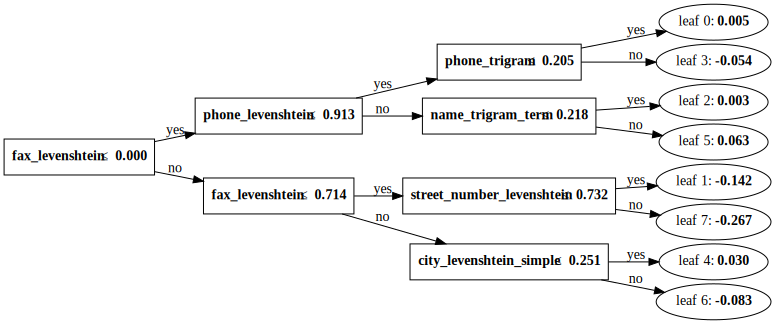

In [104]:
graph

# DO testing

In [105]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term
count,6230.000000,6230.000000,6230.000000,6230.000000
mean,0.617670,0.550384,0.521490,0.493838
std,0.309591,0.372656,0.329626,0.375572
min,0.000000,0.000000,0.000000,0.000000
25%,0.342857,0.172577,0.225806,0.120000
50%,0.666667,0.591837,0.448276,0.450806
75%,1.000000,1.000000,0.865116,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [106]:
# miss value rate
for c in test_df.columns:
    print(c,str(sum(test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.73
zip_trigram_simple 0.73
zip_levenshtein_term 0.73
zip_trigram_term 0.73
street_levenshtein_simple 0.71
street_trigram_simple 0.71
street_levenshtein_term 0.71
street_trigram_term 0.71
website_levenshtein_simple 0.94
website_trigram_simple 0.94
website_levenshtein_term 0.94
website_trigram_term 0.94
phone_levenshtein 0.59
phone_trigram 0.59
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0


/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [107]:
for c in test_df.columns:
    if 'equality' in c : 
        print("del",c)
        del test_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [108]:
new_test_df = test_df.replace("?",-1)
for c in new_test_df.columns:
    print(c,str(sum(new_test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0


In [109]:
# keep id list and remove it from test_df
id_test_list = new_test_df['id'].tolist()
del new_test_df['id']

In [112]:
raw_test_data = new_test_df
X_test = raw_test_data.astype(float)

In [115]:
# use model to predict the testing data
test_result = gbm.predict(X_test)

In [116]:
resut_df =  pd.DataFrame(test_result)

In [117]:
resut_df.describe()

,0
count,6230.000000
mean,0.705136
std,0.456018
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [119]:
best_th = 0.7

In [120]:
# testing data , predict result is as below
answer = list( zip(id_test_list,(test_result>best_th).astype(int).tolist()))

In [121]:
pd.DataFrame(answer).describe()

,1
count,6230.000000
mean,0.705136
std,0.456018
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Potential improvements
* ensemble methodology
* becasue fale positive rate is also import to operater. so in real case and production env , we need to build a doubel check mechanism
* strong rule, such as decision tree . this algorithm could produce the human readable result and rule that help our user to understnad the system behavior.


# Conclusion 
* this is a very good challenge to test a data scientist.
* i just build only one model , but i think is so far so good as baseline model.
